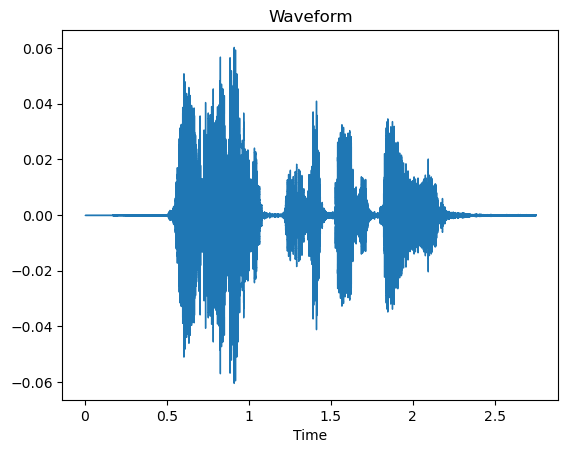

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
file_path = "C:/Users/Sreyas/Desktop/speech1.ogg"
y, sr = librosa.load(file_path)

# Display the waveform
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

In [2]:
import IPython.display as ipd

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

Original Audio:


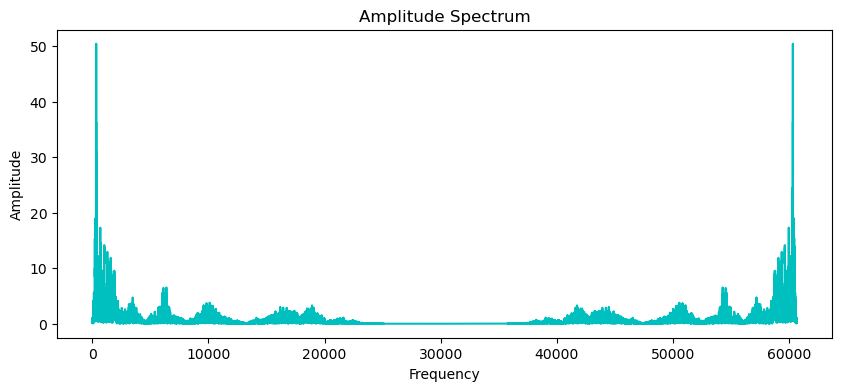

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fft_result = np.fft.fft(y)
amp_spectrum = np.abs(fft_result)

plt.figure(figsize=(10, 4))
plt.plot(amp_spectrum,"c")
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


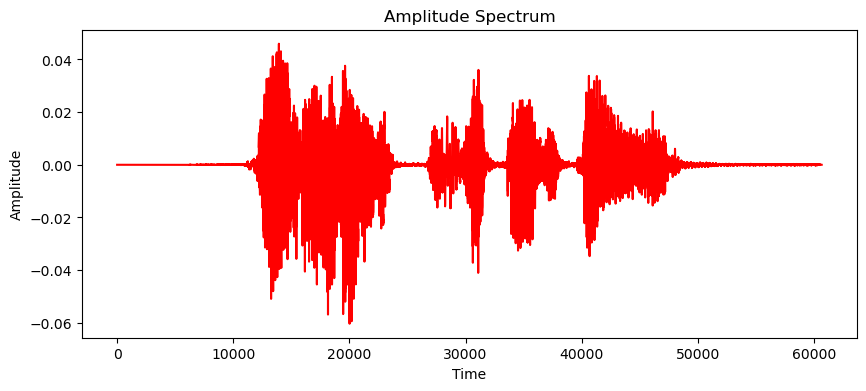

In [4]:
ifft_result = np.fft.ifft(fft_result)
plt.figure(figsize=(10, 4))
plt.plot(ifft_result,"r")

plt.title('Amplitude Spectrum')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Text(0.5, 1.0, 'Original Signal')

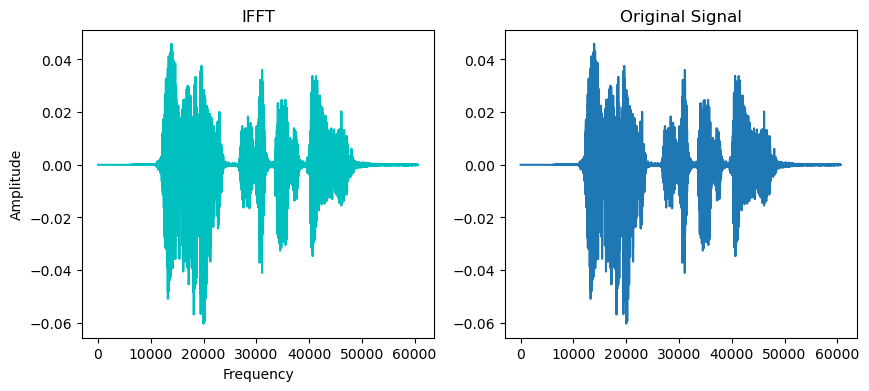

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(ifft_result,"c")
plt.title('IFFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1,2,2)
plt.plot(y)
plt.title('Original Signal')

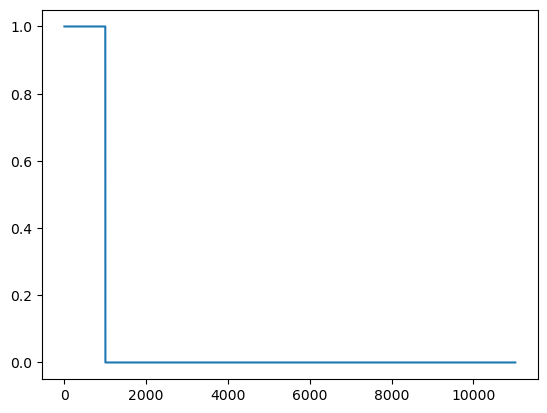

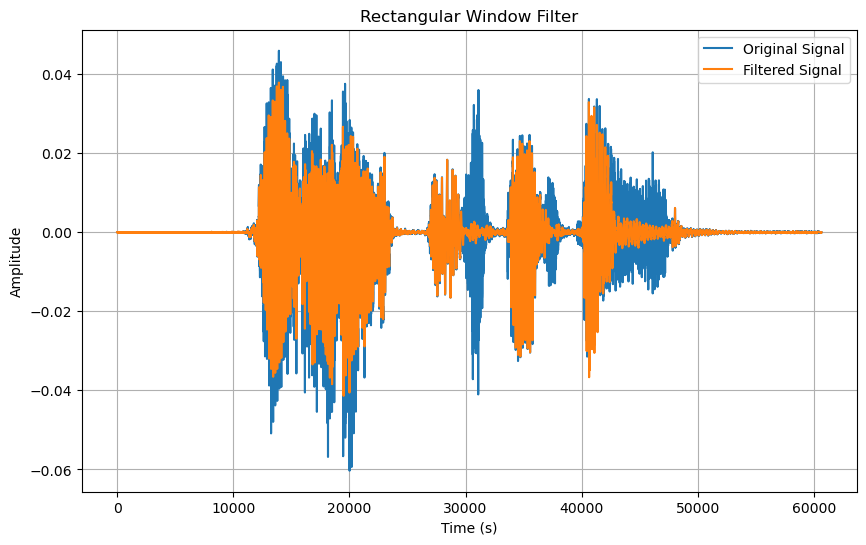

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, cutoff_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  # Compute frequency values using dft
    mask = np.abs(freqs) <= cutoff_freq  # Create a mask for frequencies below the cutoff
    plt.plot(freqs,mask) #Plotting the rectangular low pass filter
    filtered_signal_low = np.fft.irfft(np.fft.rfft(signal) * mask, n)  # Apply the mask in frequency domain
    return filtered_signal_low

# Apply rectangular window filter
cutoff_freq = 1000  # Cutoff frequency of the filter (Hz)
filtered_signal_low = rectangular_window_filter(y, cutoff_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(filtered_signal_low, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

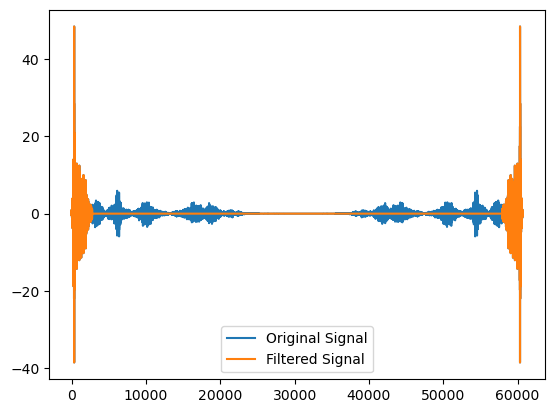

In [7]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal_low).real,label='Filtered Signal');
plt.legend();

In [8]:
ipd.display(ipd.Audio(filtered_signal_low, rate=sr))

(30332,)
[False False False ... False False False]


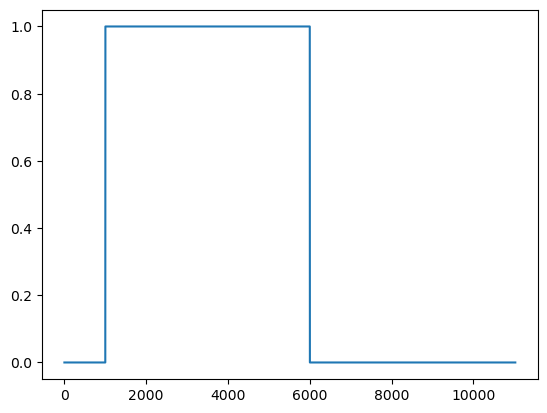

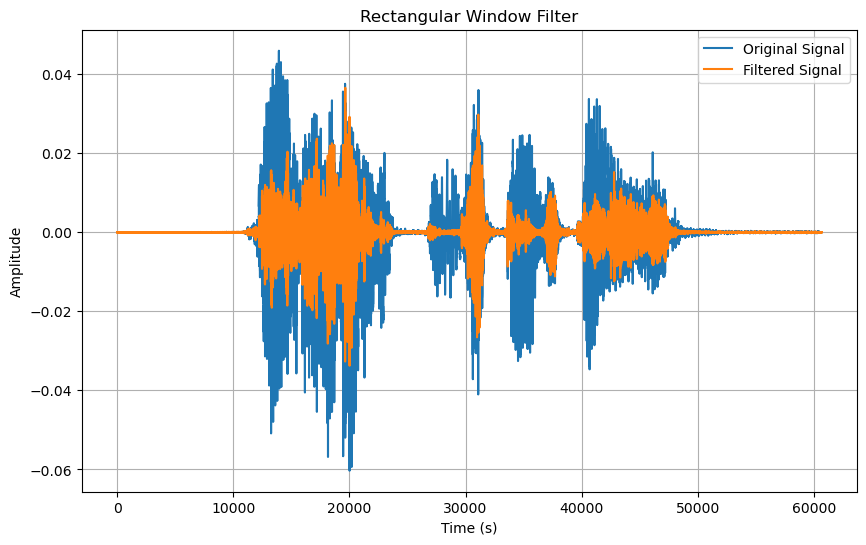

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, lower_freq, higher_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  # Compute frequency values using dft
    mask = (np.abs(freqs) >= lower_freq) & (np.abs(freqs) <= higher_freq)  # Create a mask for frequencies between lower and higher frequency cutoffs
    plt.plot(freqs,mask) #Plotting rectangular band pass filter
    print(mask.shape)
    print(mask)
    filtered_signal_band = np.fft.irfft(np.fft.rfft(signal) * mask, n)  # Apply the mask in frequency domain
    return filtered_signal_band

# Apply rectangular window filter
lower_freq = 1000  # Cutoff frequency of the filter (Hz)
higher_freq = 6000
filtered_signal_band = rectangular_window_filter(y, lower_freq, higher_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(filtered_signal_band, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

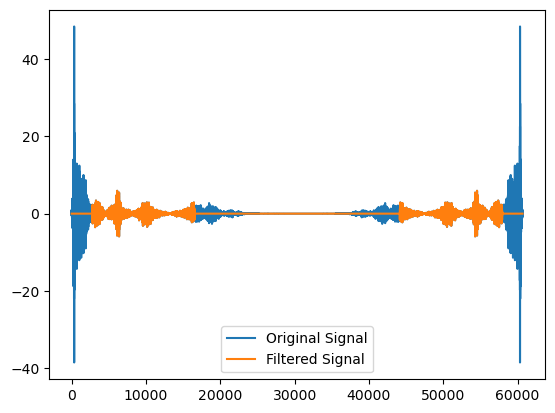

In [10]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal_band).real,label='Filtered Signal');
plt.legend();

In [11]:
ipd.display(ipd.Audio(filtered_signal_band, rate=sr))

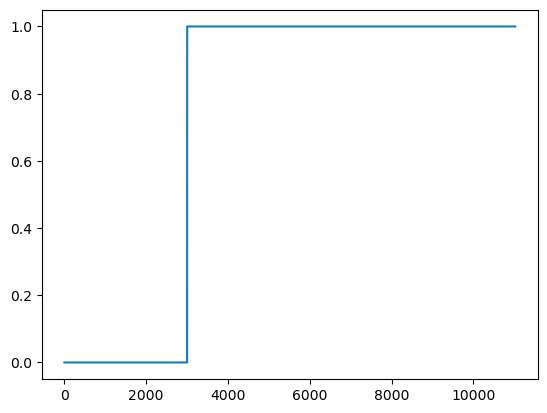

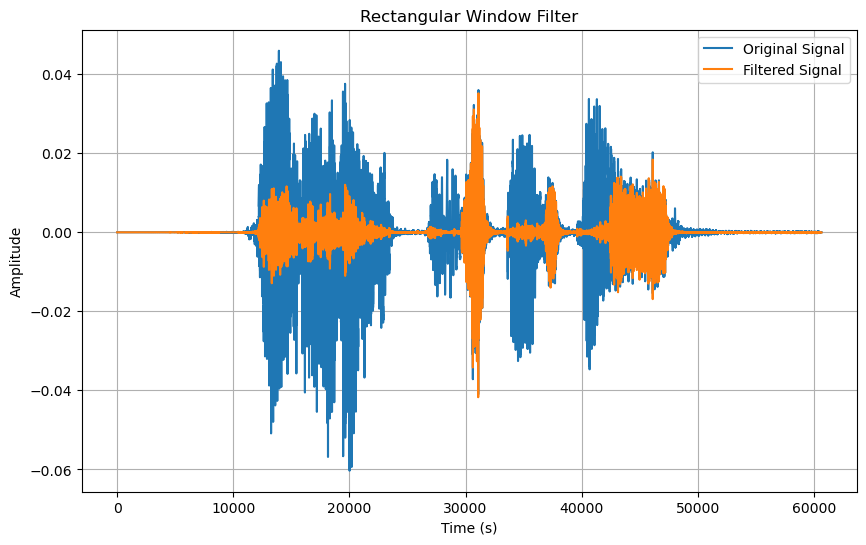

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, cutoff_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  # Compute frequency values using dft
    mask = np.abs(freqs) >= cutoff_freq  # Create a mask for frequencies above the cutoff
    plt.plot(freqs,mask) #Plotting rectangular high pass filter 
    filtered_signal_high = np.fft.irfft(np.fft.rfft(signal) * mask, n)  # Apply the mask in frequency domain
    return filtered_signal_high

# Apply rectangular window filter
cutoff_freq = 3000  # Cutoff frequency of the filter (Hz)
filtered_signal_high = rectangular_window_filter(y, cutoff_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(filtered_signal_high, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

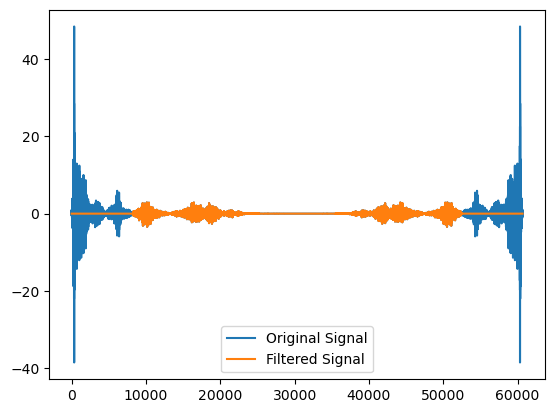

In [13]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal_high).real,label='Filtered Signal');
plt.legend()

In [14]:
ipd.display(ipd.Audio(filtered_signal_high, rate=sr))

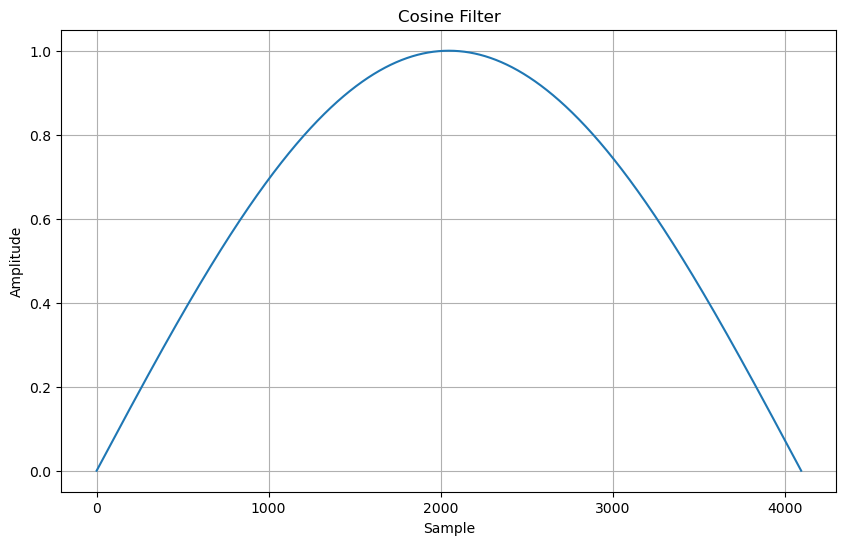

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cosine

# Generate a cosine filter
cutoff_freq = 1000  # Cutoff frequency of the filter (Hz)
window_size = 4096  # Window size for the filter
cosine_filter = cosine(window_size, np.pi * cutoff_freq)

# Plot the cosine filter
plt.figure(figsize=(10, 6))
plt.plot(cosine_filter)
plt.title('Cosine Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

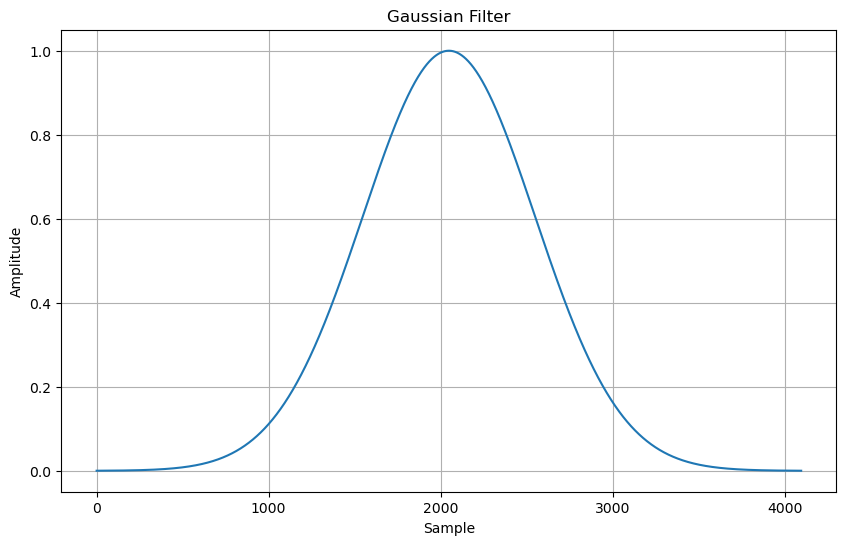

In [16]:
from scipy.signal import gaussian

# Generate a Gaussian filter
std_dev = 500  # Standard deviation of the Gaussian kernel
gaussian_filter = gaussian(window_size, std=std_dev)

# Plot the Gaussian filter
plt.figure(figsize=(10, 6))
plt.plot(gaussian_filter)
plt.title('Gaussian Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

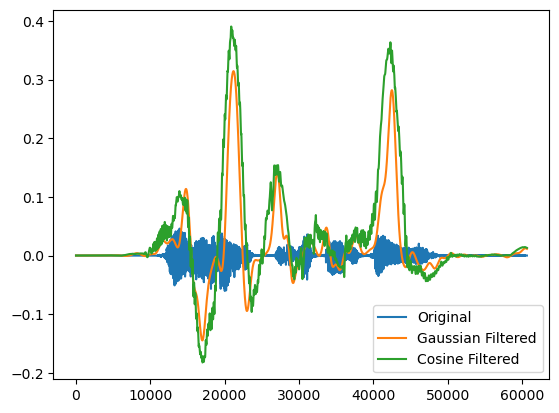

In [17]:
import librosa
from scipy.signal import convolve

y_filtered_cosine = convolve(y, cosine_filter, mode='same')
y_filtered_gaussian = convolve(y, gaussian_filter, mode='same')
plt.plot(y,label="Original")
plt.plot(y_filtered_gaussian, label='Gaussian Filtered')
plt.plot(y_filtered_cosine, label='Cosine Filtered')
plt.legend()

In [18]:
ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(y_filtered_gaussian, rate=sr))
ipd.display(ipd.Audio(y_filtered_cosine, rate=sr))